# Dataset exploration

The goal of this part is to explore the dataset. 

## 0. Load libraries and usefull functions

In [1]:
from pathlib import Path
import sys, os
sys.path.append(os.path.abspath("../src"))
import json
import random

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from collections import Counter

from cadot.utils.path import get_data_path, add_src_to_sys_path
add_src_to_sys_path()
from cadot.data.loading import load_yolo_annotations
from cadot.data.loading import get_image_label_pairs_yolo
from cadot.data.loading import get_image_label_pairs_coco
from cadot.data.loading import load_coco_annotations
from cadot.data.visualisation import plot_image_with_annotations

In [2]:
path_data = get_data_path("DataCadot_yolo")
print(path_data)
split = 'train' # choose 'train' or 'valid'
images_paths = sorted((path_data / "images" / split).glob("*.jpg"))

classes = ['Basketball Field', 'Building', 'Crosswalk', 'Football Field',
           'Graveyard', 'Large Vehicle', 'Medium Vehicle', 'Playground',
           'Roundabout', 'Ship', 'Small Vehicle', 'Swimming Pool',
           'Tennis Court', 'Train'
           ]

C:\Users\zghal\Desktop\Projet acceleration materielle\material-acceleration\DataCadot_yolo


## 1. Explore classes 
### for DataCadot in YOLO format

In [3]:
category_counts = Counter()
all_label_paths = sorted((path_data / "labels" / split).glob("*.txt"))

for label_path in all_label_paths:
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id = int(parts[0])
                class_name = classes[class_id] if class_id < len(classes) else f"class_{class_id}"
                category_counts[class_name] += 1

In [4]:
# Print statistics
print(f"\nDataCadot dataset statistics ({split.capitalize()} split):")
print(f"Total images: {len(images_paths)}")
print(f"Total label files: {len(all_label_paths)}")

print(f"\nCategory distribution in {split.capitalize()} set:")
if category_counts:
    for class_name, count in sorted(category_counts.items()):
        print(f"  {class_name}: {count}")
else:
    print(f"  No annotations found")

print(f"\nTotal annotations: {sum(category_counts.values())}")



DataCadot dataset statistics (Train split):
Total images: 3234
Total label files: 3234

Category distribution in Train set:
  Basketball Field: 15
  Building: 30764
  Crosswalk: 3751
  Football Field: 77
  Graveyard: 130
  Large Vehicle: 841
  Medium Vehicle: 3865
  Playground: 44
  Roundabout: 37
  Ship: 300
  Small Vehicle: 35149
  Swimming Pool: 60
  Tennis Court: 98
  Train: 67

Total annotations: 75198


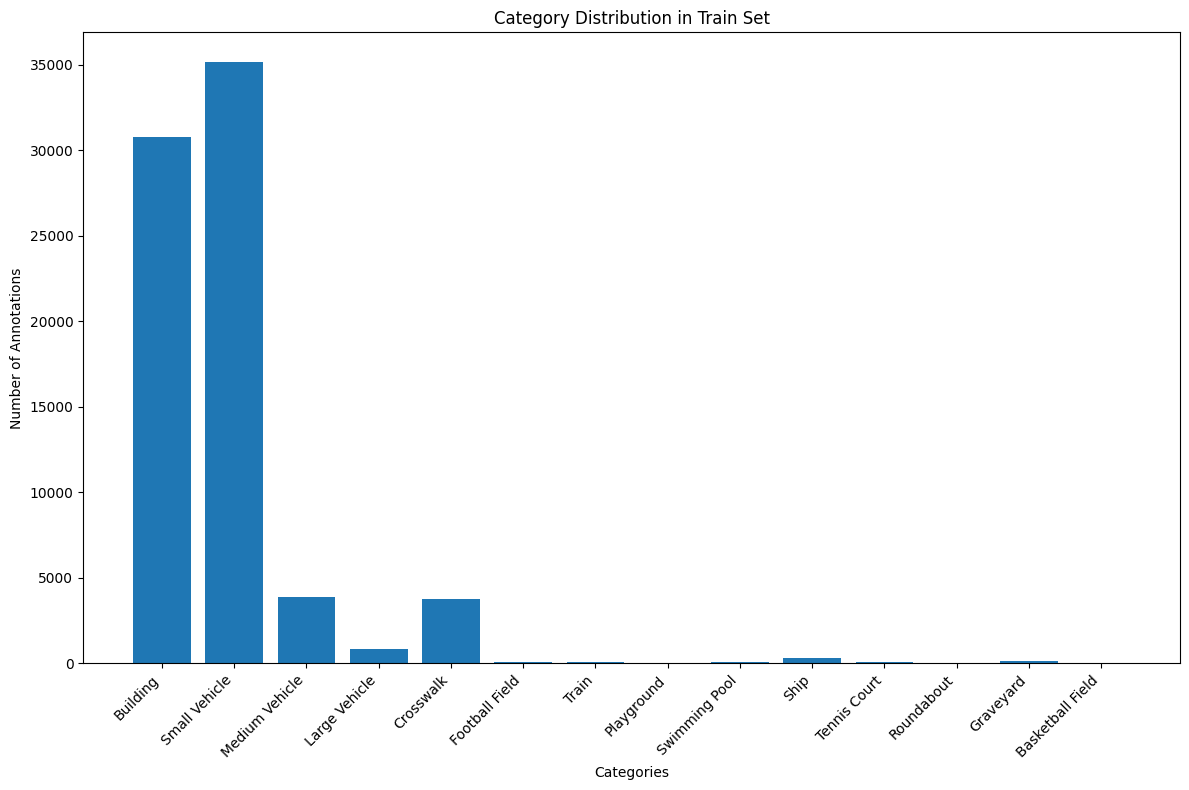

In [5]:
plt.figure(figsize=(12, 8))
plt.bar(category_counts.keys(), category_counts.values())
plt.xticks(rotation=45, ha='right')
plt.title(f"Category Distribution in {split.capitalize()} Set")
plt.xlabel("Categories")
plt.ylabel("Number of Annotations")
plt.tight_layout()
plt.show()

### for DataCadot in COCO format

In [6]:
label_paths_coco = sorted(get_data_path("merged_dataset").glob("*.json"))
label_path = label_paths_coco[0]   # prend le premier fichier

category_counts = Counter()

with open(label_path, "r") as f:
    coco = json.load(f)

# table id → nom
id_to_name = {cat["id"]: cat["name"] for cat in coco["categories"]}

# compter les annotations
for ann in coco["annotations"]:
    class_id = ann["category_id"]
    class_name = id_to_name.get(class_id, f"class_{class_id}")
    category_counts[class_name] += 1

print(category_counts)

Counter({'building': 1000, 'small vehicle': 1000, 'crosswalk': 1000, 'medium vehicle': 1000, 'large vehicle': 841, 'graveyard': 780, 'tennis court': 588, 'football field': 457, 'train': 367, 'swimming pool': 360, 'ship': 300, 'playground': 264, 'roundabout': 222, 'basketball field': 90})


In [7]:
# Print statistics
print(f"\nDataCadot dataset statistics ({split.capitalize()} split):")
print(f"Total images: {len(images_paths)}")
print(f"Total label files: {len(all_label_paths)}")

print(f"\nCategory distribution in {split.capitalize()} set:")
if category_counts:
    for class_name, count in sorted(category_counts.items()):
        print(f"  {class_name}: {count}")
else:
    print(f"  No annotations found")

print(f"\nTotal annotations: {sum(category_counts.values())}")



DataCadot dataset statistics (Train split):
Total images: 3234
Total label files: 3234

Category distribution in Train set:
  basketball field: 90
  building: 1000
  crosswalk: 1000
  football field: 457
  graveyard: 780
  large vehicle: 841
  medium vehicle: 1000
  playground: 264
  roundabout: 222
  ship: 300
  small vehicle: 1000
  swimming pool: 360
  tennis court: 588
  train: 367

Total annotations: 8269


## 2. Inspect dataset
### In yolo

We plot a sample of images and the bounding boxes with the class. We plot only a few images of the dataset. 

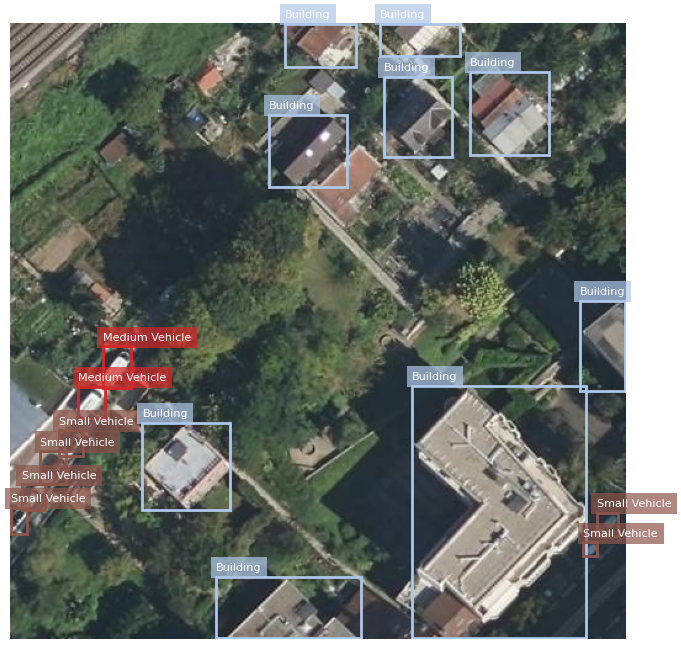

In [8]:
pairs = get_image_label_pairs_yolo("DataCadot_yolo","train")
img_path, label_path = pairs[0]

img = Image.open(img_path)
annotations = load_yolo_annotations(label_path, img.width, img.height)

plot_image_with_annotations(img, annotations, class_names=classes)

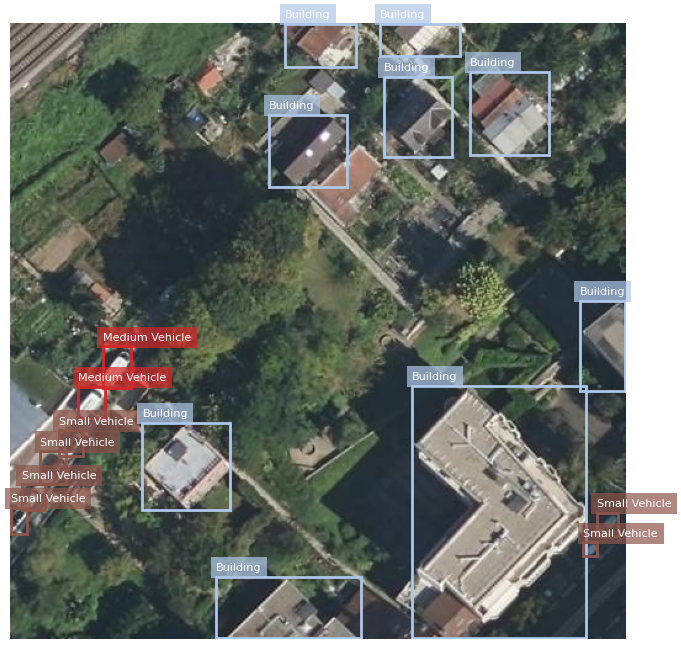

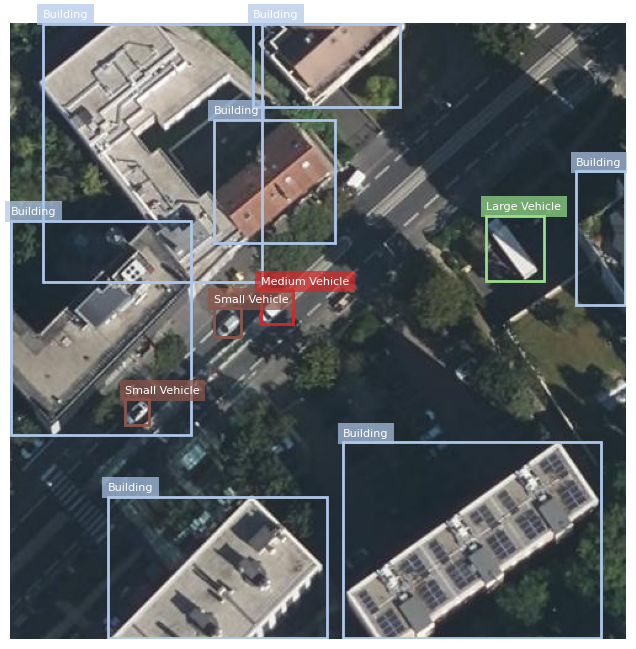

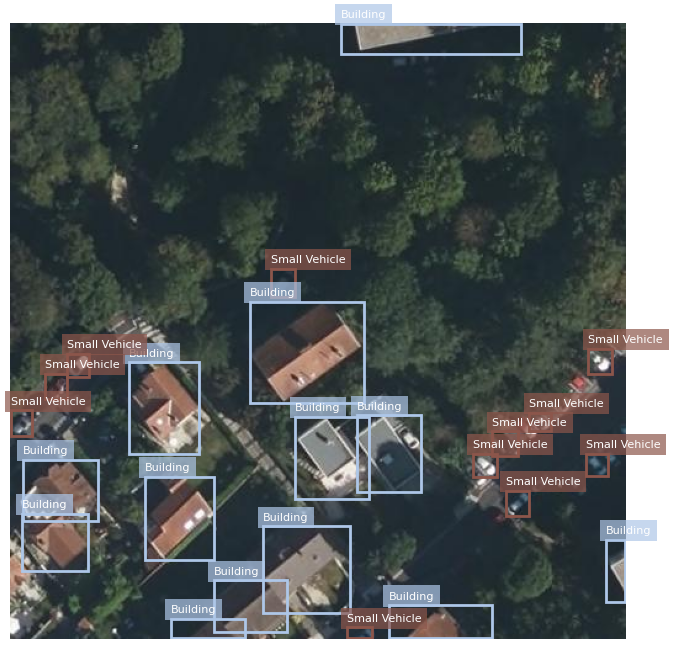

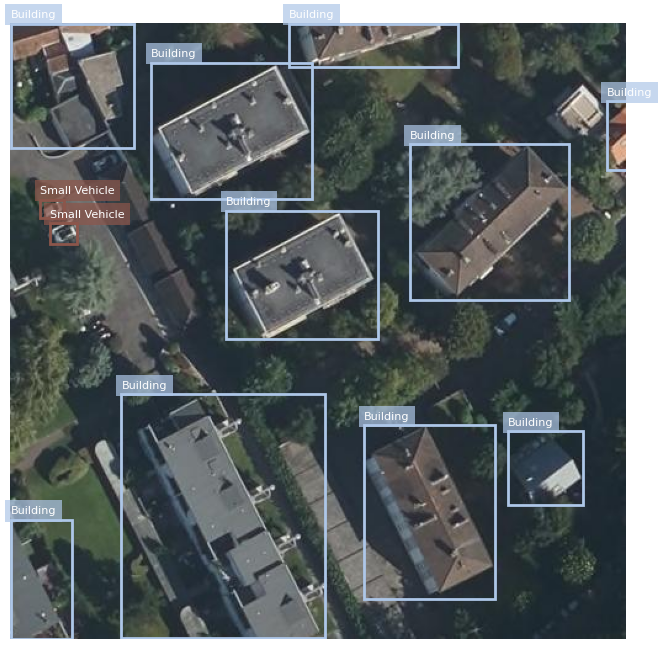

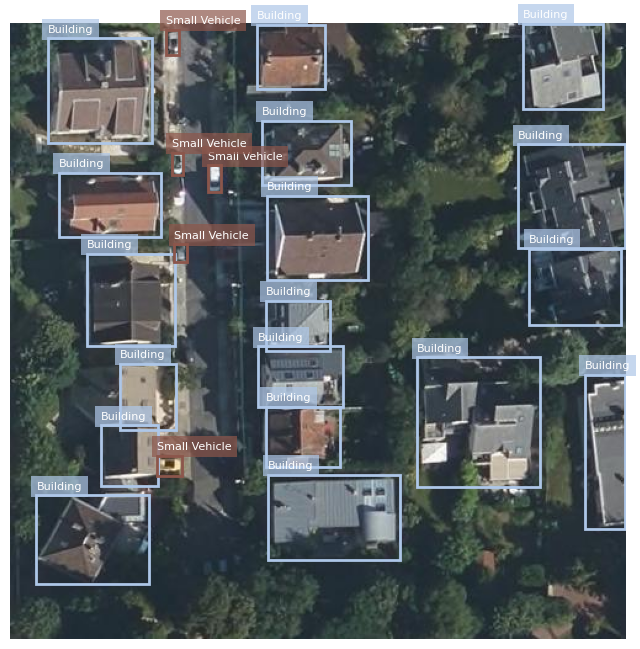

In [9]:
pairs_sample = get_image_label_pairs_yolo("DataCadot_yolo","train")[:5]

for img_path, label_path in pairs_sample:
    img = Image.open(img_path)
    annotations = load_yolo_annotations(label_path, img.width, img.height)
    plot_image_with_annotations(img, annotations, class_names=classes)

### In COCO

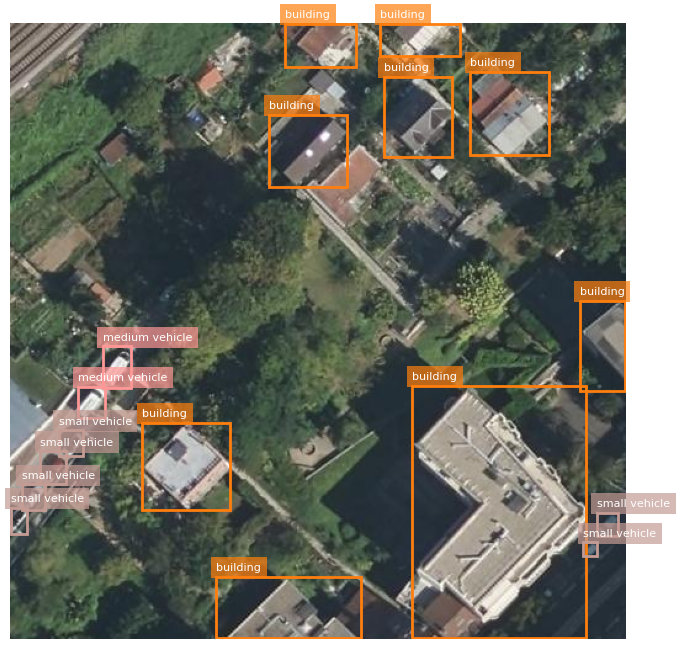

In [10]:
pairs, coco = get_image_label_pairs_coco("CADOT_Dataset")

img_path, image_id = pairs[0]

img = Image.open(img_path)

anns = load_coco_annotations(coco, image_id)

id_to_name = {c["id"]: c["name"] for c in coco["categories"]}

plot_image_with_annotations(img, anns, class_names=id_to_name)

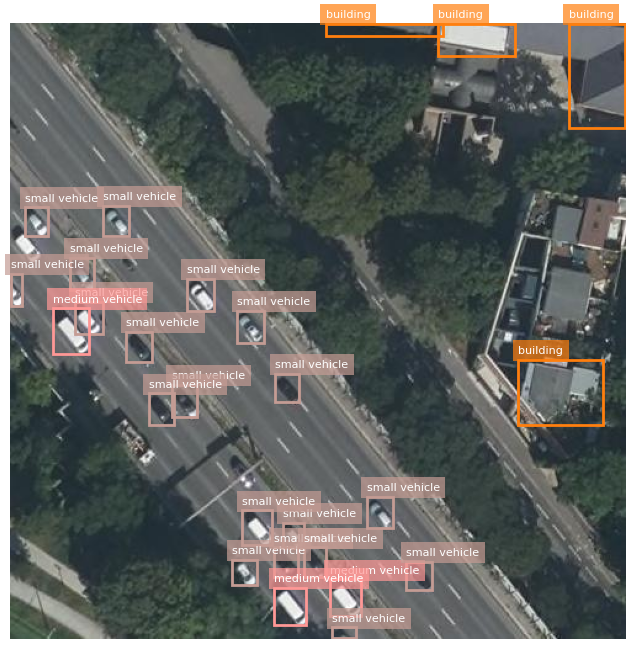

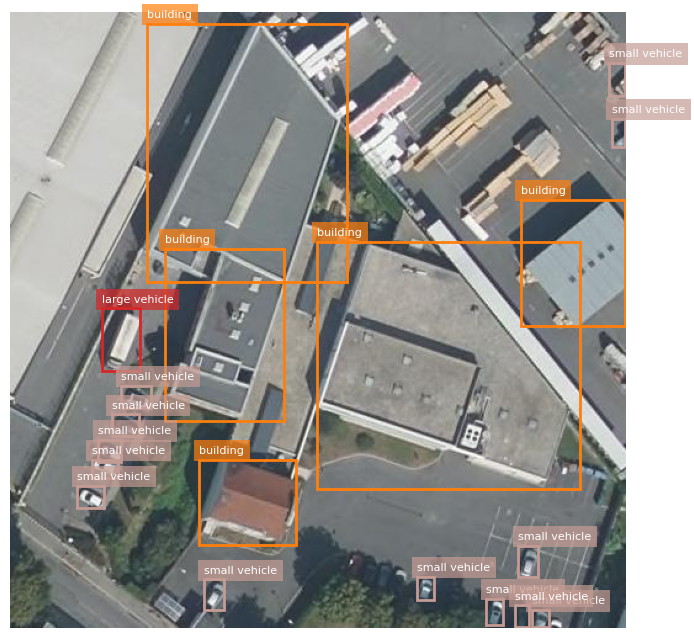

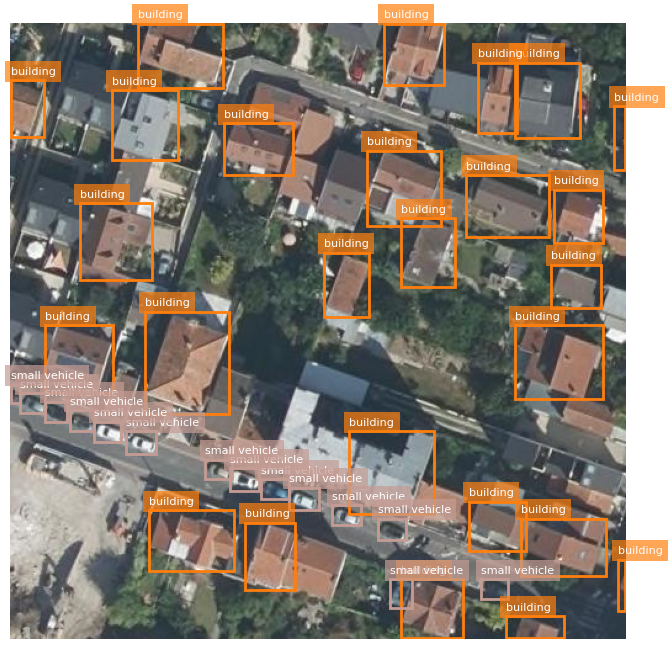

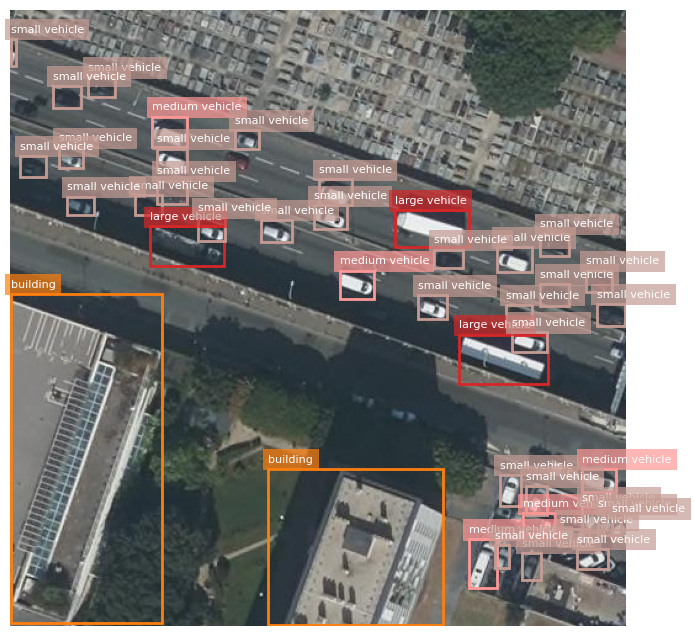

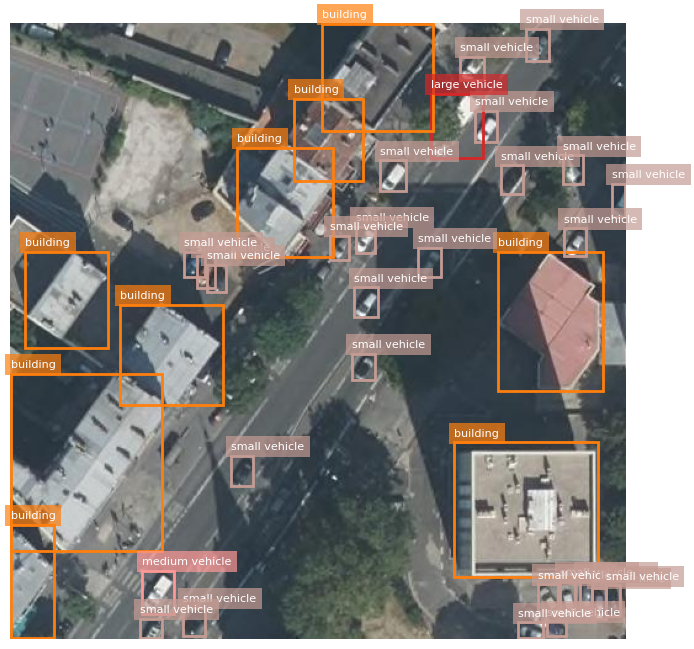

In [12]:
pairs, coco = get_image_label_pairs_coco("CADOT_Dataset")

pairs_sample = random.sample(pairs, 5)

id_to_name = {c["id"]: c["name"] for c in coco["categories"]}

for img_path, image_id in pairs_sample:
    img = Image.open(img_path)
    anns = load_coco_annotations(coco, image_id)
    plot_image_with_annotations(img, anns, class_names=id_to_name)


### For the merged dataset